In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential,Model,initializers,layers,Input
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

Residual_BottleNeck

1. MobileNetV2:  Inverted Residuals  and Linear  Bottlenecks, Figure 4(d) 기반으로 작성

2. Full-pre-activation

In [2]:
def Residual_BottleNeck_st_1_Block(x,expansion,input_channels,output_channels):
    x1=layers.BatchNormalization()(x)
    x1=layers.ReLU(max_value=6)(x1)
    x1=layers.Conv2D(filters=input_channels*expansion,kernel_size=(1,1),strides=1,padding='same')(x1)
    x1=layers.BatchNormalization()(x)
    x1=layers.ReLU(max_value=6)(x)
    x1=layers.DepthwiseConv2D(kernel_size=(3,3),strides=1,padding='same')(x1)
    x1=layers.Conv2D(filters=output_channels,kernel_size=(1,1),strides=1,padding='same')(x1)

    x2= layers.Add()([x,x1])
    return x2


def Residual_BottleNeck_st_2_Block(x,expansion,input_channels,output_channels):
    x=layers.BatchNormalization()(x)
    x=layers.ReLU(max_value=6)(x)
    x=layers.Conv2D(filters=input_channels*expansion,kernel_size=(1,1),strides=1,padding='same')(x)
    x=layers.BatchNormalization()(x)
    x=layers.ReLU(max_value=6)(x)
    x=layers.DepthwiseConv2D(kernel_size=(3,3),strides=2,padding='same')(x)
    x=layers.Conv2D(filters=output_channels,kernel_size=(1,1),strides=1,padding='same')(x)

    return x


MobileNet V2

In [3]:
input=Input(shape=(224,224,3))
x=layers.Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding='same')(input)

#x=Residual_BottleNeck_st_1_Block(x,1,16)-> Add불가능(short-connection 불가능)
x=layers.BatchNormalization()(x)
x=layers.ReLU(max_value=6)(x)
x=layers.Conv2D(filters=32,kernel_size=(1,1),strides=1,padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.ReLU(max_value=6)(x)
x=layers.DepthwiseConv2D(kernel_size=(3,3),strides=1,padding='same')(x)
x=layers.Conv2D(filters=16,kernel_size=(1,1),strides=1,padding='same')(x)

x=Residual_BottleNeck_st_2_Block(x,6,16,24)
x=Residual_BottleNeck_st_1_Block(x,6,24,24)

x=Residual_BottleNeck_st_2_Block(x,6,24,32)
x=Residual_BottleNeck_st_1_Block(x,6,32,32)
x=Residual_BottleNeck_st_1_Block(x,6,32,32)

x=Residual_BottleNeck_st_2_Block(x,6,32,64)
x=Residual_BottleNeck_st_1_Block(x,6,64,64)
x=Residual_BottleNeck_st_1_Block(x,6,64,64)
x=Residual_BottleNeck_st_1_Block(x,6,64,64)

#x=Residual_BottleNeck_st_1_Block(x,6,96,64)-> Add불가능(short-connection 불가능)
x=layers.BatchNormalization()(x)
x=layers.ReLU(max_value=6)(x)
x=layers.Conv2D(filters=64*6,kernel_size=(1,1),strides=1,padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.ReLU(max_value=6)(x)
x=layers.DepthwiseConv2D(kernel_size=(3,3),strides=1,padding='same')(x)
x=layers.Conv2D(filters=96,kernel_size=(1,1),strides=1,padding='same')(x)

x=Residual_BottleNeck_st_1_Block(x,6,96,96)
x=Residual_BottleNeck_st_1_Block(x,6,96,96)

x=Residual_BottleNeck_st_2_Block(x,6,96,160)
x=Residual_BottleNeck_st_1_Block(x,6,160,160)
x=Residual_BottleNeck_st_1_Block(x,6,160,160)

#x=Residual_BottleNeck_st_1_Block(x,1,320)->Add 불가능(short-connection 불가능)
x=layers.BatchNormalization()(x)
x=layers.ReLU(max_value=6)(x)
x=layers.Conv2D(filters=160*6,kernel_size=(1,1),strides=1,padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.ReLU(max_value=6)(x)
x=layers.DepthwiseConv2D(kernel_size=(3,3),strides=1,padding='same')(x)
x=layers.Conv2D(filters=320,kernel_size=(1,1),strides=1,padding='same')(x)

x=layers.Conv2D(filters=1280,kernel_size=(1,1),strides=1,padding='same')(x) 
x=layers.AveragePooling2D(pool_size=(7,7),strides=1)(x)
x=layers.Conv2D(filters=1280,kernel_size=(1,1),strides=1,padding='same')(x)

x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(units=10,activation='softmax')(x)

model = tf.keras.models.Model(input,x)

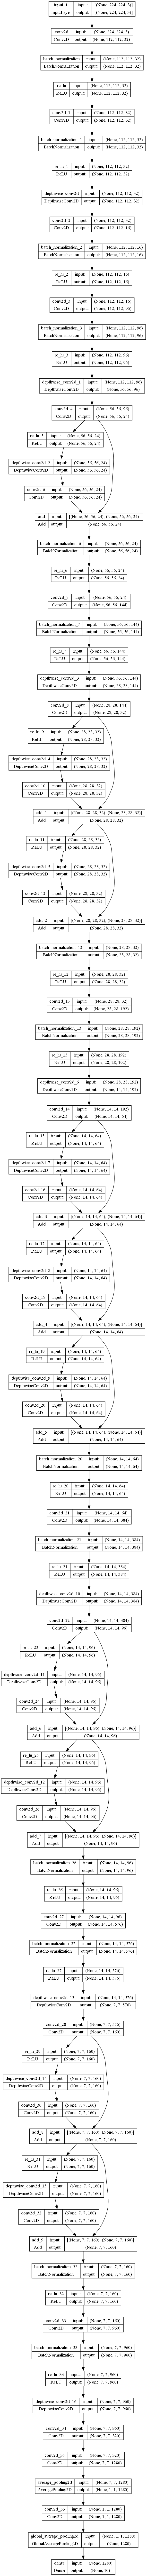

In [4]:
plot_model(model,to_file='MobileNet_V2.png',show_shapes=True)

In [20]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_127 (Conv2D)            (None, 112, 112, 32  896         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_114 (Batch  (None, 112, 112, 32  128        ['conv2d_127[0][0]']             
 Normalization)                 )                                                           

In [21]:
dir=r'D:\dataset\butterfly\train'
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
labels="inferred",
label_mode="categorical",
class_names=None,
color_mode="rgb",
batch_size=4,
image_size=(224, 224),
shuffle=True,
seed=10,
validation_split=0.1,
subset='training',
interpolation="gaussian",
follow_links=False,
crop_to_aspect_ratio=False,)


validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
labels="inferred",
label_mode='categorical',
class_names=None,
color_mode="rgb",
batch_size=4,
image_size=(224, 224),
shuffle=True,
seed=10,
validation_split=0.1,
subset='validation',
interpolation="gaussian",
follow_links=False,
crop_to_aspect_ratio=False,)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

Found 1257 files belonging to 10 classes.
Using 1132 files for training.
Found 1257 files belonging to 10 classes.
Using 125 files for validation.


In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['acc'])

In [26]:
with tf.device("/device:GPU:0"):
    history=model.fit(train_ds,validation_data=validation_ds,epochs=100,batch_size=4,verbose=1)

Epoch 1/100
283/283 [==============================] - 59s 135ms/step - loss: 2.2263 - acc: 0.1837 - val_loss: 2.3105 - val_acc: 0.1600
Epoch 2/100
283/283 [==============================] - 38s 133ms/step - loss: 2.0562 - acc: 0.2111 - val_loss: 2.0784 - val_acc: 0.3120
Epoch 3/100
283/283 [==============================] - 40s 132ms/step - loss: 1.8299 - acc: 0.3322 - val_loss: 3.3571 - val_acc: 0.2720
Epoch 4/100
283/283 [==============================] - 36s 122ms/step - loss: 1.6111 - acc: 0.4099 - val_loss: 1.4808 - val_acc: 0.4320
Epoch 5/100
283/283 [==============================] - 40s 141ms/step - loss: 1.4775 - acc: 0.4585 - val_loss: 1.5114 - val_acc: 0.4800
Epoch 6/100
283/283 [==============================] - 40s 142ms/step - loss: 1.4318 - acc: 0.4859 - val_loss: 1.4976 - val_acc: 0.4560
Epoch 7/100
283/283 [==============================] - 42s 138ms/step - loss: 1.1856 - acc: 0.5512 - val_loss: 1.4489 - val_acc: 0.5040
Epoch 8/100
283/283 [===========================

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper left')

plt.show()